In [120]:
#import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings	
warnings.filterwarnings('ignore')
%matplotlib inline 

In [121]:
#Get entire data an put it into pd dataframe
#data=pd.read_csv("/home/twachala/Pobrane/star_classification.csv")
#data=pd.read_csv("/home/twachala/Pobrane/heart.xls")
data=pd.read_csv("/home/twachala/Pobrane/brain_stroke.csv")

In [122]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [123]:
#Just info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None


In [124]:
#Locate nulls
print(data.isnull().sum().sort_values(ascending = False))
print('___'*30)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
__________________________________________________________________________________________


In [125]:
#detect missing data
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms=ms[ms['Total'] > 0] 	# ms['Total'] > 0 zwraca True gdy total>0,
			# ms[ms['Total'] > 0] zwraca kolumny, dla których Total>0
    return ms

missingdata(data)

,Total,Percent


In [126]:
for i in data.columns:
    print('Column:' + i)
    print(data[i].unique())
#data.smoking_status.value_counts()

Column:gender
['Male' 'Female']
Column:age
[6.70e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01 7.80e+01
 6.10e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 7.10e+01 5.20e+01
 8.20e+01 6.50e+01 5.70e+01 4.20e+01 4.80e+01 7.20e+01 5.80e+01 7.60e+01
 3.90e+01 7.70e+01 6.30e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01 5.90e+01
 6.60e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01 4.60e+01
 3.20e+01 5.10e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01 3.50e+01
 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01 3.30e+01
 2.40e+01 3.60e+01 6.40e-01 3.40e+01 4.10e+01 8.80e-01 5.00e+00 2.60e+01
 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01 2.80e+01
 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00 1.24e+00
 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 1.32e+00 1.60e-01 4.80e-01]
Column:

In [127]:
data.loc[data["stroke"] == 1].stroke.count()

248

In [128]:
data.loc[data["stroke"] == 0].stroke.count()

4733

In [129]:
#Replace columns below with columns containing zeros or ones
#data2 = pd.get_dummies(data, columns = ["gender","ever_married","Residence_type"],
#                             prefix=["gender","ever_married","Residence_type"])
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['ever_married'].replace(['No','Yes'],[0,1],inplace=True)
data['Residence_type'].replace(['Urban','Rural'],[0,1],inplace=True)

In [130]:
#Replace string values with numerical values
data.work_type.replace(['children','Self-employed','Private','Govt_job'],[0,1,2,3],inplace=True)
data.smoking_status.replace(['Unknown','never smoked','formerly smoked','smokes'],[0,1,2,3],inplace=True)

In [131]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,2,0,228.69,36.6,2,1
1,0,80.0,0,1,1,2,1,105.92,32.5,1,1
2,1,49.0,0,0,1,2,0,171.23,34.4,3,1
3,1,79.0,1,0,1,1,1,174.12,24.0,1,1
4,0,81.0,0,0,1,2,0,186.21,29.0,2,1


In [132]:
data2=data

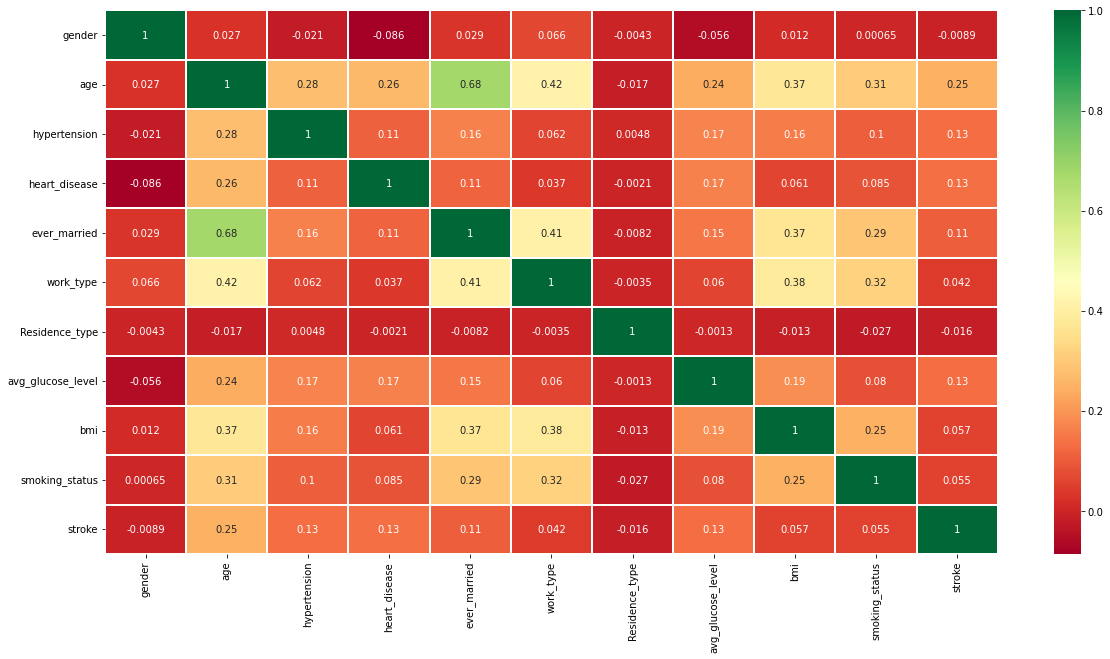

In [133]:
#Plot correlation matrix
import seaborn as sns #do narysowania macierzy korelacji oraz macierzy błędów
sns.heatmap(data2.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf() #gcf: get current figure
fig.set_size_inches(20,10)
plt.show()

In [134]:
#Prepare input vector
X = data2.drop("stroke", axis=1)

In [135]:
#Vector of labels
Y = data2["stroke"]

In [136]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,2,0,228.69,36.6,2
1,0,80.0,0,1,1,2,1,105.92,32.5,1
2,1,49.0,0,0,1,2,0,171.23,34.4,3
3,1,79.0,1,0,1,1,1,174.12,24.0,1
4,0,81.0,0,0,1,2,0,186.21,29.0,2


In [137]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [138]:
X.shape, Y.shape

((4981, 10), (4981,))

In [139]:
#Use a function to create testing and training sets
#Mix the data and split it into training and testing sets. 
#W zbiorze testowym umieścimy 10% obserwacji (test_size=0.1).
#random_state allows to repeat the same sequence,
#stratify – training and testing should have the same number of 
#labels as the input set
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.1, random_state=1, stratify=Y)

In [140]:
trainX.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4633,1,50.0,0,0,1,2,0,154.67,33.8,1
3279,0,51.0,0,0,1,1,0,75.73,30.7,1
4139,0,55.0,0,0,1,2,0,82.26,28.7,0
341,0,34.0,0,0,1,2,0,80.81,33.2,1
8,1,81.0,1,0,1,2,1,80.43,29.7,1


In [141]:
trainY.head()

4633    0
3279    0
4139    0
341     0
8       1
Name: stroke, dtype: int64

In [142]:
testX.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1902,0,59.0,0,0,1,2,1,93.90,42.2,1
3983,1,62.0,0,0,1,1,0,86.40,32.6,3
3210,1,14.0,0,0,0,2,0,83.42,28.7,1
705,1,63.0,0,0,1,2,1,92.70,29.5,1
317,1,43.0,0,0,1,1,1,118.89,43.6,1


In [143]:
testY.head()

1902    0
3983    0
3210    0
705     0
317     0
Name: stroke, dtype: int64

In [144]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((4482, 10), (4482,), (499, 10), (499,))

In [145]:
#Create separate dataframes for each class
#This is needed to plot histograms for signal and background
#if trainY == 1 then it is a signal (STROKE)
#if trainY == 0 then it is a background (NO STROKE)
trainX_sig = trainX.loc[trainY == 1]
testX_sig  = testX.loc[testY == 1]
trainX_bg  = trainX.loc[trainY == 0]
testX_bg   = testX.loc[testY == 0]

In [146]:
trainX_sig.shape, trainX_bg.shape, testX_sig.shape, testX_bg.shape

((223, 10), (4259, 10), (25, 10), (474, 10))

In [147]:
trainY[trainX_sig.index].value_counts(), trainY[trainX_bg.index].value_counts()

(1    223
 Name: stroke, dtype: int64,
 0    4259
 Name: stroke, dtype: int64)

In [148]:
testY[testX_sig.index].value_counts(), testY[testX_bg.index].value_counts()

(1    25
 Name: stroke, dtype: int64,
 0    474
 Name: stroke, dtype: int64)

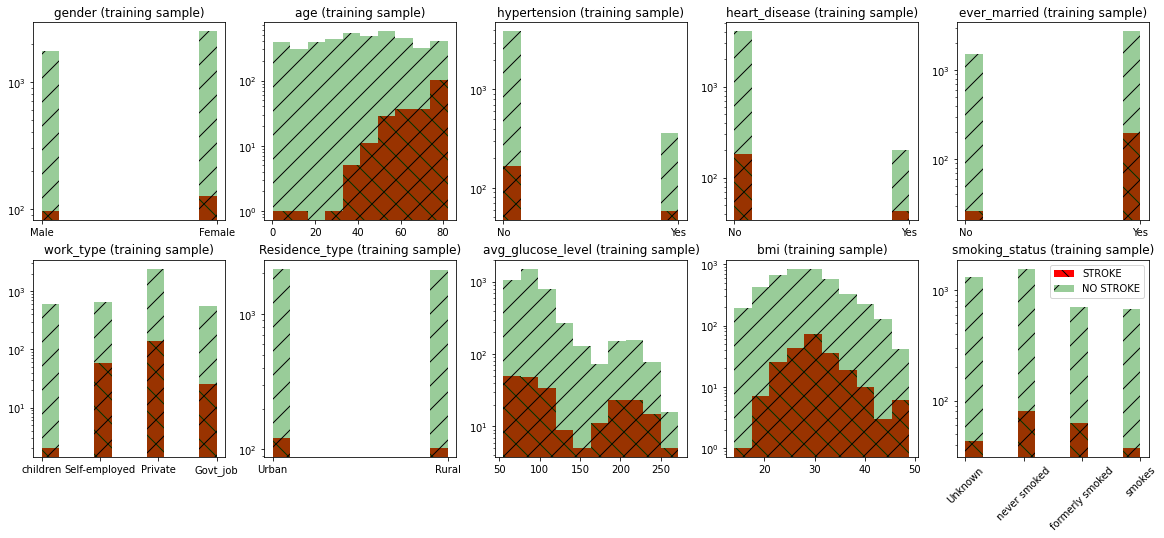

In [149]:
#Draw overlaying histograms for all classes for all columns in data
plt.rcParams['figure.figsize'] = [20, 8]
#plt.figure(figsize=(35, 15))
#display(plt.plot(x, y))
def plot_signal_bg_inputs(X_sig,X_bg,sample_name="training"):
    fig, ax = plt.subplots(2, 5)
    ct = 0
    #for column in trainX:
    for column in X_sig:
        
        rgmin = min(X_sig[column].min(),X_bg[column].min())
        rgmax = max(X_sig[column].max(),X_bg[column].max())    
        
        if ct < 5:
            i=0
            j=ct
        else:
            i=1
            j=ct-5
        
        #print(i,j)
        #fig, ax = plt.subplots(1, 1)
        #plt.hist(trainX_sig[column], range=(rgmin,rgmax),
        ax[i][j].hist(X_sig[column], range=(rgmin,rgmax),             
             #alpha=0.9, # the transaparency parameter
             color='red',
             hatch="\\",
             label='STROKE')
    
        #plt.hist(trainX_bg[column], range=(rgmin,rgmax),
        ax[i][j].hist(X_bg[column], range=(rgmin,rgmax),             
             alpha=0.4,
             color='green',
             hatch="/",
             label='NO STROKE')
                             
        if column == 'gender':        
            #plt.xticks(ticks=[0,1],labels=['Male','Female'],rotation=0)
            lbl = ['Male','Female']
            tk  = [0,1]  # the label locations
            ax[i][j].set_xticks(tk)
            ax[i][j].set_xticklabels(lbl)
        elif column == 'Residence_type':        
            #plt.xticks(ticks=[0,1],labels=['Urban','Rural'],rotation=0)        
            ax[i][j].set_xticks([0,1])
            ax[i][j].set_xticklabels(['Urban','Rural'])
        elif column in ['hypertension','heart_disease','ever_married']:
            #plt.xticks(ticks=[0,1],labels=['No','Yes'],rotation=0)
            ax[i][j].set_xticks([0,1])
            ax[i][j].set_xticklabels(['No','Yes'])
        elif column == 'work_type':
            #plt.xticks(ticks=[0,1,2,3],labels=['children','Self-employed','Private','Govt_job'],rotation=0)
            ax[i][j].set_xticks([0,1,2,3])
            ax[i][j].set_xticklabels(['children','Self-employed','Private','Govt_job'])
        elif column == 'smoking_status':
            #plt.xticks(ticks=[0,1,2,3],labels=['Unknown','never smoked','formerly smoked','smokes'],rotation=0)
            ax[i][j].set_xticks([0,1,2,3])
            ax[i][j].set_xticklabels(['Unknown','never smoked','formerly smoked','smokes'])
            ax[i][j].tick_params(axis='x',labelrotation=45)
        
        #plt.legend(loc='upper right')
        #plt.title(column + " (training sample)")
        ax[i][j].set_title(column + " (" + sample_name + " sample)")
        ax[i][j].set_yscale('log')
    
        ct = ct+1                
    
    plt.legend(loc='upper right')    
    plt.show()

plot_signal_bg_inputs(trainX_sig,trainX_bg,"training")    

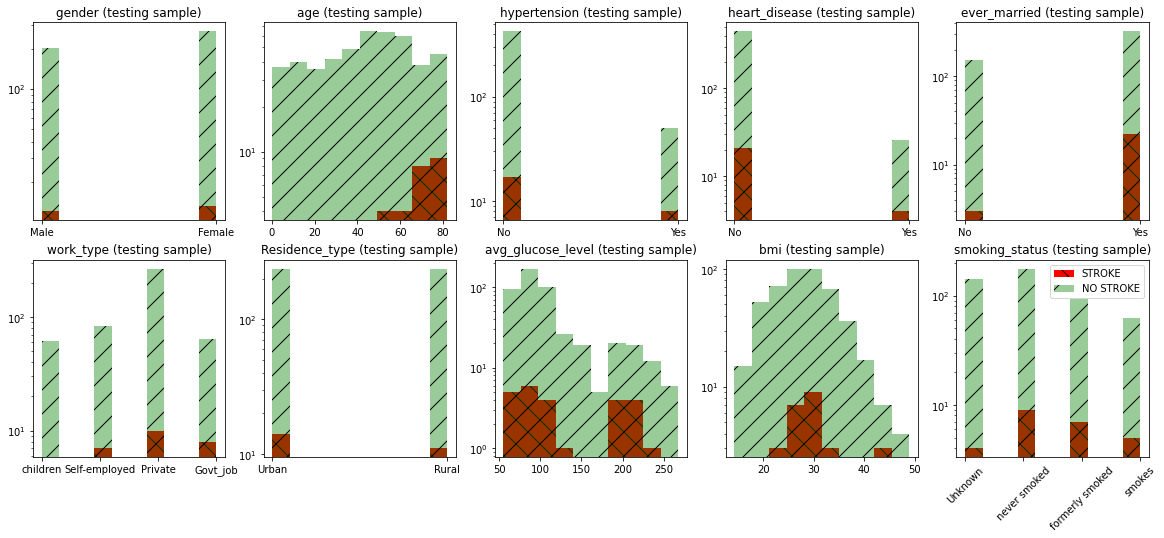

In [150]:
plot_signal_bg_inputs(testX_sig,testX_bg,"testing")

In [151]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((4482, 10), (499, 10), (4482,), (499,))

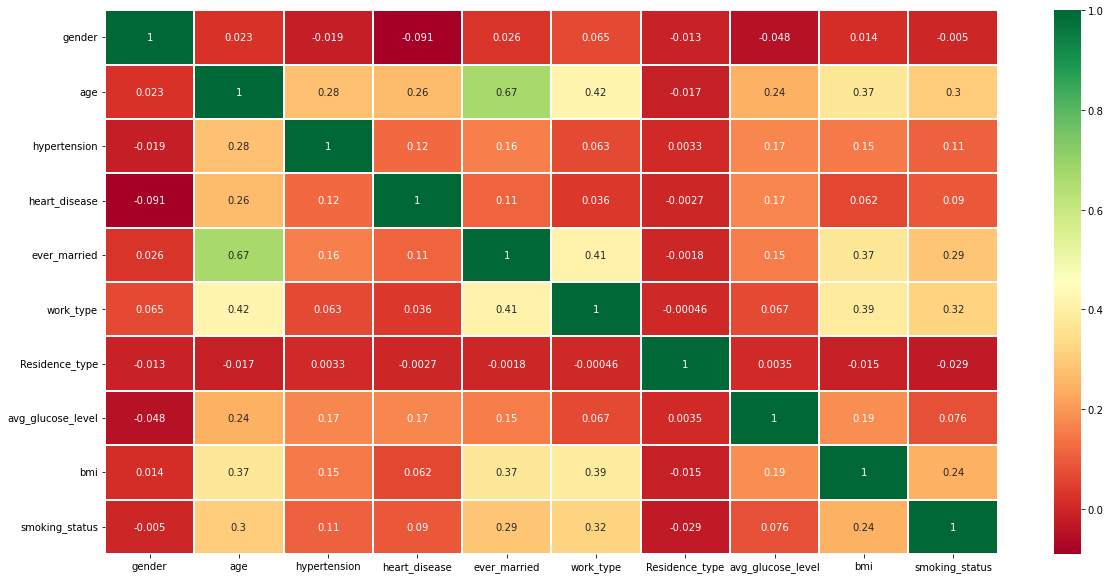

In [152]:
#Plot correlation matrix for training
import seaborn as sns #do narysowania macierzy korelacji oraz macierzy błędów
sns.heatmap(trainX.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf() #gcf: get current figure
fig.set_size_inches(20,10)
plt.show()

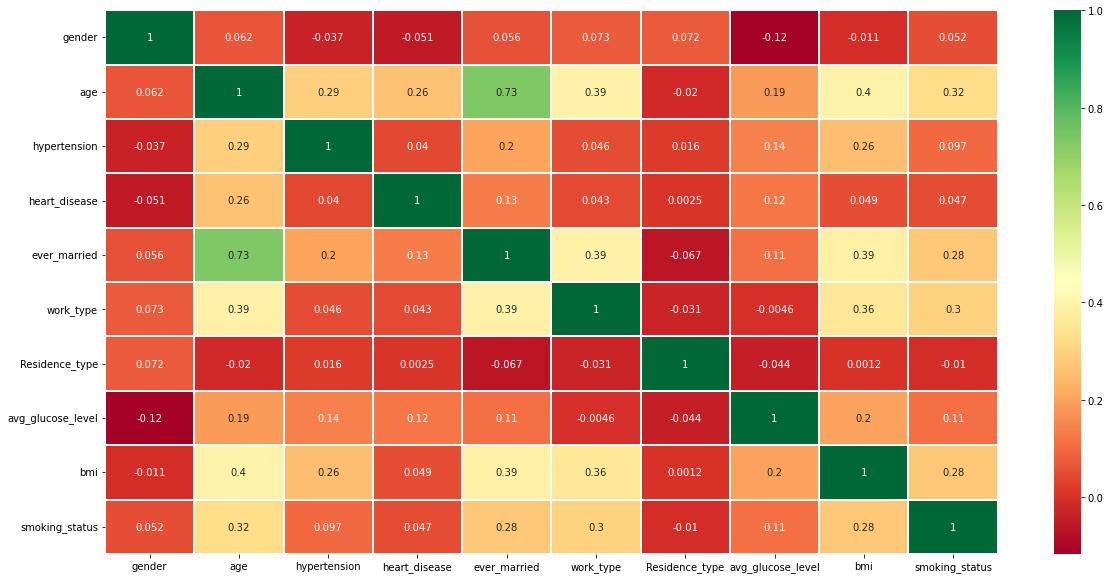

In [153]:
#Plot correlation matrix
import seaborn as sns #do narysowania macierzy korelacji oraz macierzy błędów
sns.heatmap(testX.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf() #gcf: get current figure
fig.set_size_inches(20,10)
plt.show()

In [154]:
#Import necessary libraries
import tensorflow
import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [155]:
def mlp():
    model=models.Sequential()
    model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(10,)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(5, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [156]:
model0=mlp()

In [157]:
model0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
_________________________________________________________________
dropout_4 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 18        
_________________________________________________________________
dropout_5 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [158]:
history = model0.fit(trainX, trainY, epochs=45, batch_size=64, validation_split=.1)

Epoch 1/45
64/64 [==============================] - 2s 14ms/step - loss: 0.7851 - accuracy: 0.9508 - val_loss: 0.4775 - val_accuracy: 0.9532
Epoch 2/45
64/64 [==============================] - 1s 8ms/step - loss: 0.5876 - accuracy: 0.9533 - val_loss: 0.4431 - val_accuracy: 0.9532
Epoch 3/45
64/64 [==============================] - 1s 8ms/step - loss: 0.5154 - accuracy: 0.9535 - val_loss: 0.3979 - val_accuracy: 0.9532
Epoch 4/45
64/64 [==============================] - 1s 12ms/step - loss: 0.4735 - accuracy: 0.9479 - val_loss: 0.3356 - val_accuracy: 0.9532
Epoch 5/45
64/64 [==============================] - 0s 8ms/step - loss: 0.4206 - accuracy: 0.9501 - val_loss: 0.3003 - val_accuracy: 0.9532
Epoch 6/45
64/64 [==============================] - 1s 8ms/step - loss: 0.3595 - accuracy: 0.9496 - val_loss: 0.2892 - val_accuracy: 0.9532
Epoch 7/45
64/64 [==============================] - 1s 11ms/step - loss: 0.3450 - accuracy: 0.9498 - val_loss: 0.2772 - val_accuracy: 0.9532
Epoch 8/45
64/64 

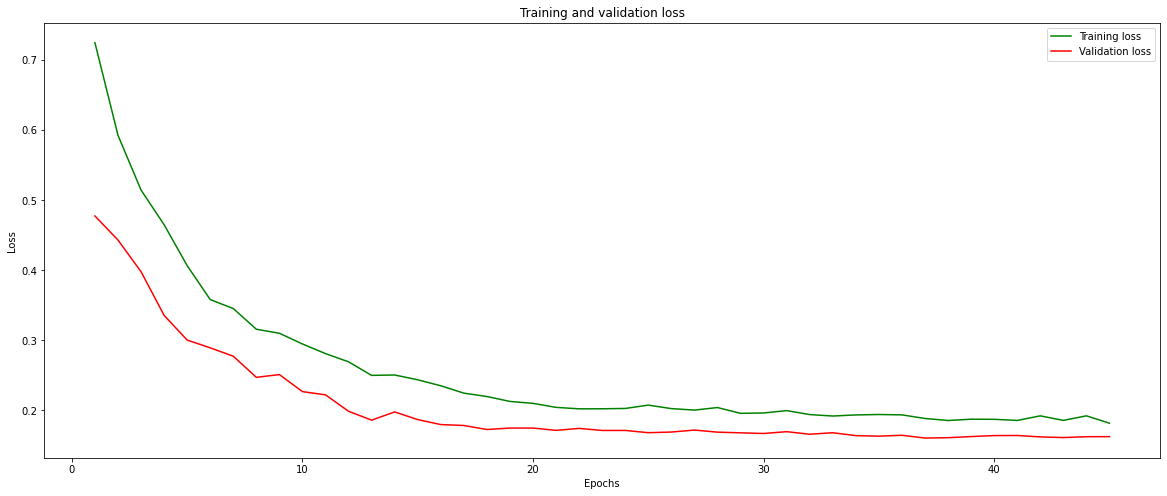

In [159]:
#Plot training and validation loss
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.title('Training and validation loss')
plt.plot(range(1,46), loss, 'g', label='Training loss') 
plt.plot(range(1,46), val_loss, 'r', label='Validation loss')
plt.legend()
plt.show()

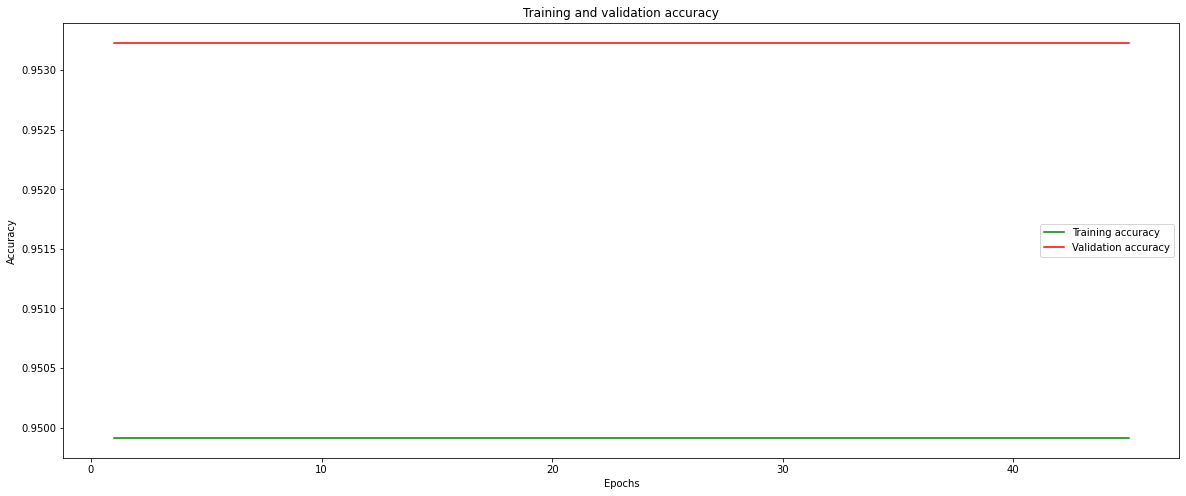

In [160]:
#Plot accuracy
accuracy=history.history['accuracy']	#lub acc
val_accuracy=history.history['val_accuracy']  #lub val_acc 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.plot(range(1,46), accuracy, 'g', label='Training accuracy') 
plt.plot(range(1,46), val_accuracy, 'r', label='Validation accuracy')
plt.legend()
#plt.show()

In [161]:
#Predict the result for the new data 'test'
pred = model0.predict(testX)
pred.shape
#print("Predicted value by the model:", pred[0])
#print ("Interpretation:", 0 if pred[0]<0.5 else 1)

(499, 1)

In [162]:
import seaborn as sns #do wizualizacji danych
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #do walidacji krzyżowej
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [163]:
#Rename variables
train_X_all = X
train_Y_all = Y
#Podział zbioru danych na treningowy i testowy:
#from sklearn.model_selection import train_test_split #for split the data
X_train = trainX
X_test = testX
y_train = trainY
y_test = testY

#train_test_split(train_X_all,train_Y_all,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4482, 10), (499, 10), (4482,), (499,))

In [164]:
#Funkcja do wykonywania predykcji przy pomocy wygenerowanych wcześniej modeli 
#oraz wykonywania walidacji krzyżowej i rysowania macierzy pomyłek
def prediction(model,mname="",plotConfusionMatrix=False):
    if mname == "":
        mname = type(model).__name__
        
    prediction=model.predict(X_test)
    
    print('The accuracy of the model is',round(accuracy_score(prediction,y_test)*100,3))
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=22) 
    
    # n_splits=5, split data into 5 equal parts
    result=cross_val_score(model,train_X_all,train_Y_all, scoring='accuracy')
    print('The cross validated score for the model is:',round(result.mean()*100,2))
    
    y_pred = cross_val_predict(model, train_X_all, train_Y_all)
    if plotConfusionMatrix:
        sns.heatmap(confusion_matrix(train_Y_all,y_pred),annot=True,fmt='3.0f',cmap="spring")
    
        #ConfusionMatrixDisplay(confusion_matrix(train_Y_all,y_pred)).plot()
        #plt.show()
    
        plt.ylabel("True")
        plt.xlabel("Predicted")
        plt.title(mname + " confusion matrix", y=1, size=12)
    
    return result

In [165]:
from sklearn.metrics import plot_roc_curve
from sklearn.calibration import CalibratedClassifierCV

# Compute ROC curve and ROC area
def calc_roc(model, mname="",plotCurve=False):
    
    if mname == "":        
        mname = type(model).__name__

    #Calibrate
    calmodel = CalibratedClassifierCV(model)
    calmodel.fit(X_train,y_train)
    
    pred = calmodel.predict_proba(X_test)
    probs = pred[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, probs)
    rauc = auc(fpr, tpr)

    #print(rauc)
    if plotCurve:
        svc_disp = plot_roc_curve(calmodel, X_test, y_test,name = mname)
        svc_disp.figure_.suptitle("Receiver Operating Characteristic")
        svc_disp.ax_.grid(linestyle="--")
    
        lw = 2
        plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    
    return rauc

In [166]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [167]:
#Zestawienie użytych klasyfikatorów i uporządkowanie od najlepszego według SCORE
models = pd.DataFrame({
    'Name': ['Multilayer Perceptron',
              'Support Vector Machines', 
              'KNN', 
              'Logistic Regression', 
              'Random Forest', 
              'Naive Bayes', 
              'AdaBoostClassifier', 
              'Gradient Decent', 
              'Linear Discriminant Analysis', 
              'Decision Tree', 
              'XGBoost'],
    'Inst': [MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 3), random_state=1),
             SVC(probability=True),
             KNeighborsClassifier(n_neighbors = 4),
             LogisticRegression(),             
             RandomForestClassifier(),                          
             GaussianNB(),
             AdaBoostClassifier(),
             GradientBoostingClassifier(),
             LinearDiscriminantAnalysis(),
             DecisionTreeClassifier(),                                       
             XGBClassifier(disable_default_eval_metric=True)]})


In [168]:
fits     = []
cvscores = []
aucs     = []
for model in models.Inst:
    fits.append(model.fit(X_train, y_train))
    #print(models.Name)
    #result = cross_val_score(model,train_X_all,train_Y_all, scoring='accuracy')
    result = prediction(model)
    cvscores.append(result.mean())
    aucs.append(calc_roc(model))

models["Fit"] = fits
models["CVScore"] = cvscores
models["AUC"] = aucs

models

The accuracy of the model is 94.99
The cross validated score for the model is: 95.02
The accuracy of the model is 94.99
The cross validated score for the model is: 95.02
The accuracy of the model is 94.79
The cross validated score for the model is: 94.76
The accuracy of the model is 94.99
The cross validated score for the model is: 95.0
The accuracy of the model is 94.79
The cross validated score for the model is: 94.84
The accuracy of the model is 82.966
The cross validated score for the model is: 86.01
The accuracy of the model is 94.79
The cross validated score for the model is: 94.9
The accuracy of the model is 94.79
The cross validated score for the model is: 94.78
The accuracy of the model is 94.79
The cross validated score for the model is: 94.36
The accuracy of the model is 88.978
The cross validated score for the model is: 90.72
The accuracy of the model is 94.589
The cross validated score for the model is: 94.02


,Name,Inst,Fit,CVScore,AUC
0,Multilayer Perceptron,"MLPClassifier(alpha=1e-05, hidden_layer_sizes=...","MLPClassifier(alpha=1e-05, hidden_layer_sizes=...",0.950211,0.800211
1,Support Vector Machines,SVC(probability=True),SVC(probability=True),0.950211,0.762363
2,KNN,KNeighborsClassifier(n_neighbors=4),KNeighborsClassifier(n_neighbors=4),0.947602,0.650717
3,Logistic Regression,LogisticRegression(),LogisticRegression(),0.950010,0.860169
4,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...","(DecisionTreeClassifier(max_features='auto', r...",0.948404,0.811983
5,Naive Bayes,GaussianNB(),GaussianNB(),0.860066,0.798734
6,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...","(DecisionTreeClassifier(max_depth=1, random_st...",0.949006,0.826920
7,Gradient Decent,([DecisionTreeRegressor(criterion='friedman_ms...,([DecisionTreeRegressor(criterion='friedman_ms...,0.947801,0.840253
8,Linear Discriminant Analysis,LinearDiscriminantAnalysis(),LinearDiscriminantAnalysis(),0.943585,0.842954
9,Decision Tree,DecisionTreeClassifier(),DecisionTreeClassifier(),0.907249,0.606329


In [169]:
# Posortowanie według AUC
models_score = models.sort_values(by='CVScore', ascending=False)
models_score

,Name,Inst,Fit,CVScore,AUC
0,Multilayer Perceptron,"MLPClassifier(alpha=1e-05, hidden_layer_sizes=...","MLPClassifier(alpha=1e-05, hidden_layer_sizes=...",0.950211,0.800211
1,Support Vector Machines,SVC(probability=True),SVC(probability=True),0.950211,0.762363
3,Logistic Regression,LogisticRegression(),LogisticRegression(),0.950010,0.860169
6,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...","(DecisionTreeClassifier(max_depth=1, random_st...",0.949006,0.826920
4,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...","(DecisionTreeClassifier(max_features='auto', r...",0.948404,0.811983
7,Gradient Decent,([DecisionTreeRegressor(criterion='friedman_ms...,([DecisionTreeRegressor(criterion='friedman_ms...,0.947801,0.840253
2,KNN,KNeighborsClassifier(n_neighbors=4),KNeighborsClassifier(n_neighbors=4),0.947602,0.650717
8,Linear Discriminant Analysis,LinearDiscriminantAnalysis(),LinearDiscriminantAnalysis(),0.943585,0.842954
10,XGBoost,"XGBClassifier(base_score=0.5, booster='gbtree'...","XGBClassifier(base_score=0.5, booster='gbtree'...",0.940173,0.775527
9,Decision Tree,DecisionTreeClassifier(),DecisionTreeClassifier(),0.907249,0.606329


In [170]:
models_auc = models.sort_values(by='AUC', ascending=False)
models_auc

,Name,Inst,Fit,CVScore,AUC
3,Logistic Regression,LogisticRegression(),LogisticRegression(),0.950010,0.860169
8,Linear Discriminant Analysis,LinearDiscriminantAnalysis(),LinearDiscriminantAnalysis(),0.943585,0.842954
7,Gradient Decent,([DecisionTreeRegressor(criterion='friedman_ms...,([DecisionTreeRegressor(criterion='friedman_ms...,0.947801,0.840253
6,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...","(DecisionTreeClassifier(max_depth=1, random_st...",0.949006,0.826920
4,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...","(DecisionTreeClassifier(max_features='auto', r...",0.948404,0.811983
0,Multilayer Perceptron,"MLPClassifier(alpha=1e-05, hidden_layer_sizes=...","MLPClassifier(alpha=1e-05, hidden_layer_sizes=...",0.950211,0.800211
5,Naive Bayes,GaussianNB(),GaussianNB(),0.860066,0.798734
10,XGBoost,"XGBClassifier(base_score=0.5, booster='gbtree'...","XGBClassifier(base_score=0.5, booster='gbtree'...",0.940173,0.775527
1,Support Vector Machines,SVC(probability=True),SVC(probability=True),0.950211,0.762363
2,KNN,KNeighborsClassifier(n_neighbors=4),KNeighborsClassifier(n_neighbors=4),0.947602,0.650717


In [171]:
models_insts_auc = models_auc.Inst

In [172]:
models_insts_auc

3                                  LogisticRegression()
8                          LinearDiscriminantAnalysis()
7     ([DecisionTreeRegressor(criterion='friedman_ms...
6     (DecisionTreeClassifier(max_depth=1, random_st...
4     (DecisionTreeClassifier(max_features='auto', r...
0     MLPClassifier(alpha=1e-05, hidden_layer_sizes=...
5                                          GaussianNB()
10    XGBClassifier(base_score=0.5, booster='gbtree'...
1                                 SVC(probability=True)
2                   KNeighborsClassifier(n_neighbors=4)
9                              DecisionTreeClassifier()
Name: Inst, dtype: object

In [173]:
def legend_without_duplicate_labels(figure):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), loc='lower right')

<Figure size 1080x1080 with 0 Axes>

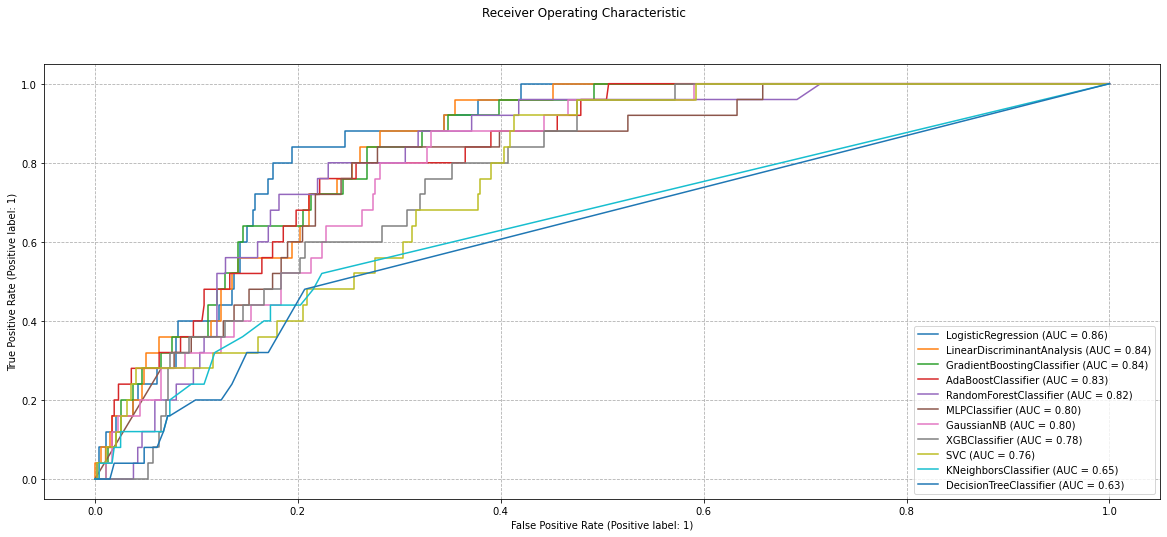

In [174]:
#Plot overlaid ROC curves for all classifiers
from matplotlib.pyplot import cm
#plt.figure(figsize=(15,15))
#sns.set_palette("pastel", 11, .75)
linewidth=2
#plt.rcParams['figure.figsize'] = [15, 15]
plt.figure(figsize=(15, 15))
#display(plt.plot(x, y))

count = 0
for model_instantiation in models_insts_auc:    
    mname=type(model_instantiation).__name__
    #y_score = model_instantiation.fit(X_train, y_train).decision_function(X_test)
    #print(mname)
    #if mname == 'SVC':
    #    mprobs = model_instantiation.fit(X_train,y_train).decision_function(X_test)
    #else:
        
    cmodel = CalibratedClassifierCV(model_instantiation)
    cmodelfit = cmodel.fit(X_train,y_train)
    mpred = cmodelfit.predict_proba(X_test)  
    
    #mpred = model_instantiation.fit(X_train,y_train).predict_proba(X_test)  
    mprobs = mpred[:, 1]    

    # Compute ROC curve and ROC area
    mfpr, mtpr, _ = roc_curve(y_test,mprobs)
    mroc_auc = auc(mfpr, mtpr)

    if count == 0:        
        mdisp = plot_roc_curve(cmodel, X_test, y_test,name=mname)    
        mdisp.figure_.suptitle("Receiver Operating Characteristic")
        mdisp.ax_.grid(linestyle="--")
    else:
        mdisp = plot_roc_curve(cmodel, X_test, y_test,name=mname,ax=mdisp.ax_)   
        
    count = count+1
    
    #lbl="Model: %s (area = %0.2f)" % (mname,mroc_auc)
    #plt.plot(mfpr,mtpr,lw=linewidth,label=lbl)
    #legend_without_duplicate_labels(plt)
    
#plt.plot([0, 1], [0, 1], color="navy", lw=linewidth, linestyle="--")
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel("False Positive Rate")
#plt.ylabel("True Positive Rate")
#plt.title("ROC curve")    
plt.show()

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
param_grid = {'penalty' : ['l2','l1','elasticnet'],                       
              'C' : [1.0,0.7,0.3,0.1], #regularization
              'fit_intercept' : [True,False], 
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
              'max_iter' : [50,100,150,200]              
            }

In [177]:
lr_grid_1 = GridSearchCV(models.loc[models_auc.AUC.idxmax()].Inst, param_grid, cv=10)

In [178]:
#import winsound #nie działa w colab
from timeit import default_timer as tm
import time
start=tm()
lr_grid_1.fit(X_train, y_train)
print(tm()-start)
#winsound.Beep(3500, 1500) #nie działa w colab

135.1531905849988


In [179]:
#Najlepsza kombinacja parametrów:
lr_grid_1.best_params_ 

{'C': 1.0,
 'fit_intercept': True,
 'max_iter': 50,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [180]:
#Najlepszy estymator:
lr_grid_1.best_estimator_

LogisticRegression(max_iter=50, solver='newton-cg')

In [181]:
#Najlepszy wynik
lr_grid_1.best_score_

0.9502460825644288

In [182]:
#Now, predict with the best estimator
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(max_iter=50, solver='newton-cg')
model = lr_grid_1.best_estimator_
model.fit(X_train,y_train)
print('logistic regression')
result=prediction(model)
auc=calc_roc(model)

logistic regression
The accuracy of the model is 94.99
The cross validated score for the model is: 95.02


Model: LogisticRegression


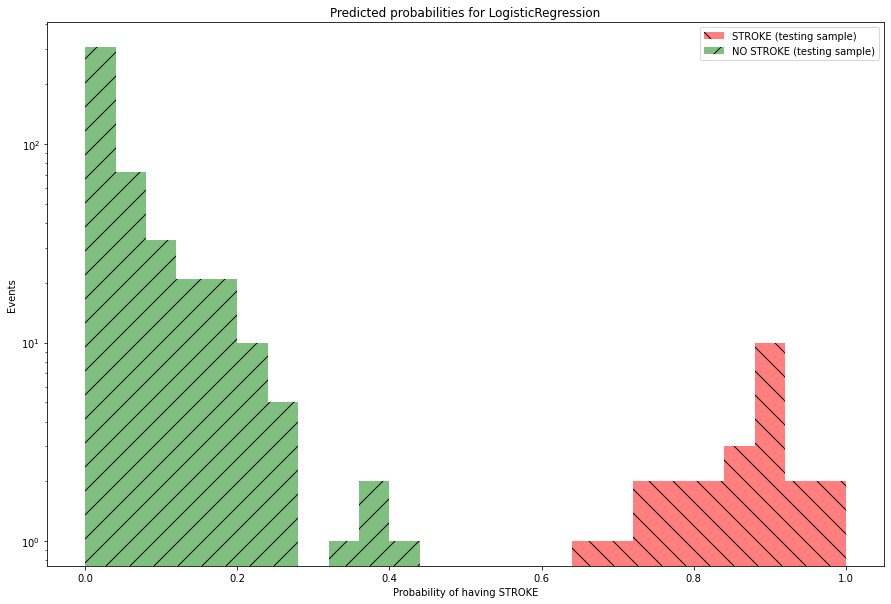

In [213]:
#Draw overlaying histograms for predictions for training and testing set for signal and bg
def draw_output_proba(model,calibrate=False):
    plt.figure(figsize=(15,10))
    #sns.set_palette("pastel")

    #The model is the one with the largest AUC
    #model = LogisticRegression(max_iter=50, solver='newton-cg')
    ############################
    #Use calibration for probabilities
    #Not used since no change here
    #from sklearn.calibration import CalibratedClassifierCV
    #lr = lr_grid_1.best_estimator_
    #model = CalibratedClassifierCV(lr)
    #model.fit(X_train, y_train)
    ########################
    #model = lr_grid_1.best_estimator_
    mname = type(model).__name__    
    print("Model: " + mname)
    
    #rgmin = min(trainPred_sig.min(),trainPred_bg.min(),testPred_sig.min(),testPred_bg.min())
    #rgmax = max(trainPred_sig.max(),trainPred_bg.max(),testPred_sig.max(),testPred_bg.max())    
    rgmin = 0.0
    rgmax = 1.0
    
    if calibrate:
        model1 = CalibratedClassifierCV(model)
        model1.fit(X_train,y_train)
        
        #Cannot plot output probabilities for training samples since it will be biased
        #because model has been calibrated on them        
        testPred_sig  = model1.predict_proba(testX_sig)[:, 0]
        testPred_bg   = model1.predict_proba(testX_bg)[:, 1]
        
    else:
        model.fit(X_train,y_train)
        
        testPred_sig  = model.predict_proba(testX_sig)[:, 0]
        testPred_bg   = model.predict_proba(testX_bg)[:, 1]    
        
    plt.hist(testPred_sig.ravel(), range=(rgmin,rgmax),
             alpha=0.5, # the transaparency parameter
             #linestyle='--',
             #histtype='step',
             color='red',
             hatch="\\",
             #ec='red',
             bins=25,
             lw=3,
             label='STROKE (testing sample)')
    
    plt.hist(testPred_bg.ravel(), range=(rgmin,rgmax),
             alpha=0.5,
             #linestyle='--',
             #histtype='step',
             color='green',
             hatch="/",
             #ec='green',
             bins=25,
             lw=3,
             label='NO STROKE (testing sample)')                    
    
    plt.legend(loc='upper right')
    plt.title('Predicted probabilities for '+ mname)
    plt.xlabel("Probability of having STROKE")
    plt.ylabel("Events")
    plt.yscale('log')
    plt.show()
    
#Get best model    
bmodel = lr_grid_1.best_estimator_
draw_output_proba(bmodel)    

In [193]:
#Draw overlaying histograms for predictions for training and testing set for signal and bg
def compare_train_test_output_proba(model):
    plt.figure(figsize=(15,15))
    
    mname = type(model).__name__    
    print("Model: " + mname)
    
    #rgmin = min(trainPred_sig.min(),trainPred_bg.min(),testPred_sig.min(),testPred_bg.min())
    #rgmax = max(trainPred_sig.max(),trainPred_bg.max(),testPred_sig.max(),testPred_bg.max())    
    rgmin = 0.0
    rgmax = 1.0
    
    model.fit(X_train,y_train)
        
    trainPred_sig = model.predict_proba(trainX_sig)[:, 0]    
    trainPred_bg  = model.predict_proba(trainX_bg)[:, 1]
    testPred_sig  = model.predict_proba(testX_sig)[:, 0]
    testPred_bg   = model.predict_proba(testX_bg)[:, 1]    
        
    plt.hist(trainPred_sig.ravel(), range=(rgmin,rgmax),
             alpha=0.5, # the transaparency parameter
             #histtype='step',
             color = "red", 
             #ec="red",
             bins=25,         
             label='STROKE (training sample)')

    plt.hist(testPred_sig.ravel(), range=(rgmin,rgmax),
             alpha=0.5, # the transaparency parameter
             linestyle='--',
             histtype='step',
             #color=['green','black'],
             ec='red',
             bins=25,
             lw=3,
             label='STROKE (testing sample)')

    plt.hist(trainPred_bg.ravel(), range=(rgmin,rgmax),
             alpha=0.5,
             linestyle='--',
             #histtype='step',
             color='green',
             bins=25,         
             label='NO STROKE (training sample)')
    
    plt.hist(testPred_bg.ravel(), range=(rgmin,rgmax),
             #alpha=0.4,
             linestyle='--',
             histtype='step',
             #color=['green','black'],
             ec='green',
             bins=25,
             lw=3,
             label='NO STROKE (testing sample)')    
    
    plt.legend(loc='upper right')
    plt.title('Predicted probabilities for '+ mname)
    plt.xlabel("Probability of being STROKE")
    plt.ylabel("Events")
    plt.yscale('log')
    plt.show()
    
    #Calculate KS-Test values for histograms above
    from scipy.stats import ks_2samp

    print("KS Test Signal and Background: ")    
    outtr = ks_2samp(np.ravel(trainPred_sig),np.ravel(testPred_sig))
    outtest = ks_2samp(np.ravel(trainPred_bg),np.ravel(testPred_bg))
    
    print(outtr)
    print(outtest)                

In [194]:
predTest_sig = bmodel.predict_proba(testX_sig)  
predTest_bg = bmodel.predict_proba(testX_bg)  
predTest_sig > 0.3, predTest_bg < 0.4

(array([[ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True,  True],
        [ True, False]]),
 array([[False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False,  True],
        [False

In [195]:
#Alternative function to draw output probabilities
def draw_output_proba_alt(model):
    prediction=model.predict_proba(X_test)[:,1]
    plt.figure(figsize=(15,7))
    plt.hist(prediction[y_test==0], bins=50, label='Negatives')
    plt.hist(prediction[y_test==1], bins=50, label='Positives', alpha=0.7, color='r')
    plt.xlabel('Probability of being Positive Class', fontsize=25)
    plt.ylabel('Number of records in each bucket', fontsize=25)
    plt.legend(fontsize=15)
    plt.tick_params(axis='both', labelsize=25, pad=5)
    plt.yscale('log')
    plt.show()

In [196]:
from sklearn.feature_selection import SequentialFeatureSelector
from time import time

feature_names = np.array(X_train.columns)

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    bmodel, n_features_to_select=2, direction="forward"
).fit(X_train, y_train)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    bmodel, n_features_to_select=2, direction="backward"
).fit(X_train, y_train)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['gender' 'age']
Done in 1.644s
Features selected by backward sequential selection: ['heart_disease' 'avg_glucose_level']
Done in 16.795s


In [197]:
param_grid2 = {#"hidden_layer_sizes": [(6,4),(6,3),(6,2),(5,4),(5,3),(5,2),(4,4),(4,3),(4,2)], 
               #"hidden_layer_sizes": [(6,4),(6,3),(5,4),(5,3),(4,4),(4,3)], 
               "hidden_layer_sizes": [(6,3),(5,3),(4,2)], 
               "activation": ['identity', 'logistic', 'tanh', 'relu'], 
               "solver": ['lbfgs', 'sgd', 'adam'], 
               "alpha": [0.0001,0.0005,0.001],                
               ##"batch_size": ['auto'], 
               #"learning_rate": ['constant', 'invscaling', 'adaptive'], 
               #"learning_rate_init": [0.001,0.005,0.01], 
               #"power_t": [0.4,0.5,0.6], 
               ##"max_iter": [200], 
               ##"shuffle": [True], 
               ##"random_state": [None], 
               ##"tol": [0.0001],                
               "warm_start": [True], 
               #"momentum": [0.9], 
               ##"nesterovs_momentum": [True], 
               "early_stopping": [False], 
               ##"validation_fraction": [0.1], 
               #"beta_1": [0.9,0.8,0.7,0.6], 
               #"beta_2": [0.999,0.8,0.7,0.6], 
               ##"epsilon": [1e-08], 
               ##"n_iter_no_change": [10], 
               ##"max_fun": [15000])
            }

In [200]:
mlp_grid = GridSearchCV(models.loc[models_score.CVScore.idxmax()].Inst, param_grid2, cv=10, verbose=4)

In [201]:
#import winsound #nie działa w colab
from timeit import default_timer as tm
import time
start=tm()
mlp_grid.fit(X_train, y_train)
print(tm()-start)
#winsound.Beep(3500, 1500) #nie działa w colab

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV 1/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.3s
[CV 2/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.3s
[CV 3/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.3s
[CV 4/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.2s
[CV 5/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.3s
[CV 6/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, 

[CV 2/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.949 total time=   1.7s
[CV 3/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.944 total time=   1.1s
[CV 4/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.946 total time=   1.4s
[CV 5/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.946 total time=   1.4s
[CV 6/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.951 total time=   1.3s
[CV 7/10] END activation=identity, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.949 total time=   1.4s
[CV 8/10] END activation=identity, alpha

[CV 5/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.949 total time=   0.1s
[CV 6/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.2s
[CV 7/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.2s
[CV 8/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.2s
[CV 9/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.2s
[CV 10/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.949 total time=   0.2s
[CV 1/10] END activation=identity, alpha=0.00

[CV 7/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.6s
[CV 8/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.4s
[CV 9/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.3s
[CV 10/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.3s
[CV 1/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(4, 2), solver=sgd, warm_start=True;, score=0.947 total time=   0.2s
[CV 2/10] END activation=identity, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(4, 2), solver=sgd, warm_start=True;, score=0.938 total time=   0.2s
[CV 3/10] END activation=identity, al

[CV 9/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=adam, warm_start=True;, score=0.951 total time=   0.8s
[CV 10/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=adam, warm_start=True;, score=0.949 total time=   0.9s
[CV 1/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.2s
[CV 2/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.1s
[CV 3/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.2s
[CV 4/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.2s
[CV 5/10] END activation=identity, alpha=

[CV 1/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.947 total time=   0.4s
[CV 2/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.947 total time=   0.6s
[CV 3/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.946 total time=   0.5s
[CV 4/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.951 total time=   0.3s
[CV 5/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.951 total time=   0.8s
[CV 6/10] END activation=identity, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.951 total time=   0.6s
[CV 7/10] END activation=identity, alpha=0.001

[CV 3/10] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.5s
[CV 4/10] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.5s
[CV 5/10] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.5s
[CV 6/10] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.5s
[CV 7/10] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.5s
[CV 8/10] END activation=logistic, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.6s
[CV 9/10] END activation=logistic, alpha=0.000

[CV 5/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.4s
[CV 6/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.5s
[CV 7/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.4s
[CV 8/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.3s
[CV 9/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.4s
[CV 10/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.4s
[CV 1/10] END activation=logistic

[CV 7/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.951 total time=   0.9s
[CV 8/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.951 total time=   0.9s
[CV 9/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.951 total time=   0.8s
[CV 10/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.949 total time=   0.8s
[CV 1/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.3s
[CV 2/10] END activation=logistic, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.3s
[CV 3/10] END activation=logistic, al

[CV 9/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.6s
[CV 10/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.949 total time=   0.5s
[CV 1/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=adam, warm_start=True;, score=0.949 total time=   2.0s
[CV 2/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=adam, warm_start=True;, score=0.949 total time=   1.8s
[CV 3/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=adam, warm_start=True;, score=0.951 total time=   1.7s
[CV 4/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=adam, warm_start=True;, score=0.951 total time=   1.8s
[CV 5/10] END activation=logistic, alpha=0.001,

[CV 1/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=sgd, warm_start=True;, score=0.949 total time=   0.8s
[CV 2/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=sgd, warm_start=True;, score=0.949 total time=   0.6s
[CV 3/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=sgd, warm_start=True;, score=0.951 total time=   0.6s
[CV 4/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=sgd, warm_start=True;, score=0.951 total time=   0.6s
[CV 5/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=sgd, warm_start=True;, score=0.951 total time=   0.7s
[CV 6/10] END activation=logistic, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=sgd, warm_start=True;, score=0.951 total time=   0.6s
[CV 7/10] END activation=logistic, alpha=0.001, earl

[CV 5/10] END activation=tanh, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.2s
[CV 6/10] END activation=tanh, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.5s
[CV 7/10] END activation=tanh, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.2s
[CV 8/10] END activation=tanh, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.3s
[CV 9/10] END activation=tanh, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.0s
[CV 10/10] END activation=tanh, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.1s
[CV 1/10] END activation=tanh, alpha=0.0001, early_stoppi

[CV 8/10] END activation=tanh, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.951 total time=   1.6s
[CV 9/10] END activation=tanh, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.951 total time=   1.5s
[CV 10/10] END activation=tanh, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.949 total time=   1.5s
[CV 1/10] END activation=tanh, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.2s
[CV 2/10] END activation=tanh, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.1s
[CV 3/10] END activation=tanh, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.5s
[CV 4/10] END activation=tanh, alpha=0.0005, early_stopping=

[CV 1/10] END activation=tanh, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.949 total time=   0.8s
[CV 2/10] END activation=tanh, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.949 total time=   0.7s
[CV 3/10] END activation=tanh, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.951 total time=   0.8s
[CV 4/10] END activation=tanh, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.951 total time=   0.8s
[CV 5/10] END activation=tanh, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.951 total time=   0.8s
[CV 6/10] END activation=tanh, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.951 total time=   1.6s
[CV 7/10] END activation=tanh, alpha=0.0005, early_stopping=Fals

[CV 4/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.3s
[CV 5/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.3s
[CV 6/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.3s
[CV 7/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.3s
[CV 8/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.3s
[CV 9/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.3s
[CV 10/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_la

[CV 7/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.4s
[CV 8/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.4s
[CV 9/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.5s
[CV 10/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.5s
[CV 1/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=sgd, warm_start=True;, score=0.949 total time=   0.6s
[CV 2/10] END activation=tanh, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=sgd, warm_start=True;, score=0.949 total time=   0.4s
[CV 3/10] END activation=tanh, alpha=0.001, early_stopping=False, h

[CV 10/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=adam, warm_start=True;, score=0.949 total time=   1.7s
[CV 1/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.1s
[CV 2/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.3s
[CV 3/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.2s
[CV 4/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.0s
[CV 5/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(5, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.1s
[CV 6/10] END activation=relu, alpha=0.0001, early_stoppin

[CV 3/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.951 total time=   1.4s
[CV 4/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.951 total time=   1.5s
[CV 5/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.951 total time=   2.0s
[CV 6/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.951 total time=   1.7s
[CV 7/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.951 total time=   1.6s
[CV 8/10] END activation=relu, alpha=0.0001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=adam, warm_start=True;, score=0.951 total time=   1.6s
[CV 9/10] END activation=relu, alpha=0.0001, early_stopping=Fals

[CV 6/10] END activation=relu, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.8s
[CV 7/10] END activation=relu, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.8s
[CV 8/10] END activation=relu, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.6s
[CV 9/10] END activation=relu, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.8s
[CV 10/10] END activation=relu, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=sgd, warm_start=True;, score=0.949 total time=   1.1s
[CV 1/10] END activation=relu, alpha=0.0005, early_stopping=False, hidden_layer_sizes=(5, 3), solver=adam, warm_start=True;, score=0.949 total time=   1.4s
[CV 2/10] END activation=relu, alpha=0.0005, early_stopping=False, h

[CV 9/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.6s
[CV 10/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.5s
[CV 1/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.949 total time=   0.5s
[CV 2/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.949 total time=   0.4s
[CV 3/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.3s
[CV 4/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(6, 3), solver=sgd, warm_start=True;, score=0.951 total time=   0.4s
[CV 5/10] END activation=relu, alpha=0.001, early_stopping=False, hidde

[CV 2/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.949 total time=   0.1s
[CV 3/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.1s
[CV 4/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.3s
[CV 5/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.1s
[CV 6/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.2s
[CV 7/10] END activation=relu, alpha=0.001, early_stopping=False, hidden_layer_sizes=(4, 2), solver=lbfgs, warm_start=True;, score=0.951 total time=   0.3s
[CV 8/10] END activation=relu, alpha=0.001, early_stopping=False

In [202]:
#Najlepsza kombinacja parametrów:
mlp_grid.best_params_ 

{'activation': 'identity',
 'alpha': 0.0001,
 'early_stopping': False,
 'hidden_layer_sizes': (5, 3),
 'solver': 'lbfgs',
 'warm_start': True}

In [203]:
#Najlepszy estymator:
mlp_grid.best_estimator_

MLPClassifier(activation='identity', hidden_layer_sizes=(5, 3), random_state=1,
              solver='lbfgs', warm_start=True)

In [204]:
#Najlepszy wynik
mlp_grid.best_score_

0.9502460825644288

In [210]:
#Now, predict with the best estimator using Score
model = mlp_grid.best_estimator_
model.fit(X_train,y_train)
print('MLP')
result_mlp_best=prediction(model)
#auc_mlp_best=calc_roc(model)

MLP
The accuracy of the model is 94.99
The cross validated score for the model is: 95.02


Model: MLPClassifier


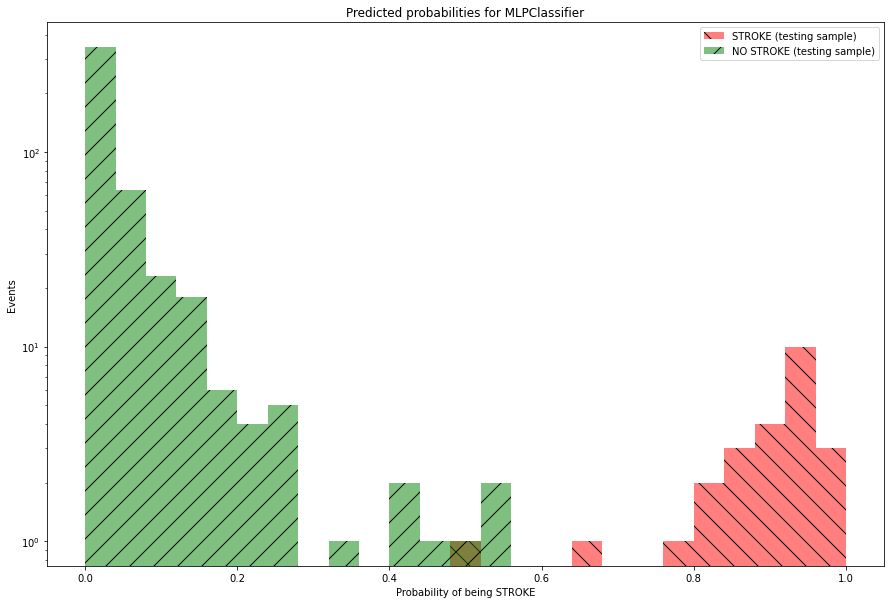

In [206]:
#Get model with best score
bmodel2 = mlp_grid.best_estimator_
draw_output_proba(bmodel2,calibrate=True)    

In [207]:
from sklearn.feature_selection import SequentialFeatureSelector
from time import time

feature_names = np.array(X_train.columns)

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    bmodel2, n_features_to_select=2, direction="forward"
).fit(X_train, y_train)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(
    bmodel2, n_features_to_select=2, direction="backward"
).fit(X_train, y_train)
toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

Features selected by forward sequential selection: ['gender' 'age']
Done in 8.040s
Features selected by backward sequential selection: ['bmi' 'smoking_status']
Done in 138.955s


In [208]:
plt.plot(bmodel2.loss_curve_)

AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'

In [209]:
plt.plot(bmodel2.validation_scores_)

AttributeError: 'MLPClassifier' object has no attribute 'validation_scores_'